# Preperaing the Data

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import re
import time
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
import math
import string
import numpy as np

class WhatsAppChat:
    def __init__(self, filenames):
        self.filenames = filenames
        
    def open_file(self, f):
        x = open(f, 'r')
        y = x.read()
        content = y.splitlines()
        return content
    
    def init(self):
        df = pd.DataFrame(columns=['id', 'name', 'message', 'date', 'time'])
        for f in self.filenames:
            lines = self.open_file(f)
            df2 = self.process(lines)
            df = df.append(df2, ignore_index=True)
        return df
    
    def remove_stopwords(self, txt):
        stopwords = ["לא","כן","את","לא","של","אני","על","זה","עם","כל","הוא","אם","או","גם","יותר","יש","לי","מה","אבל","פורום","אז","טוב","רק","כי","שלי","היה","בפורום","אין","עוד","היא","אחד","ב","ל","עד","לך","כמו","להיות","אתה","כמה","אנחנו","הם","כבר","אנשים","אפשר","תודה","שלא","אותו","ה","מאוד","הרבה","ולא","ממש","לו","א","מי","חיים","בית","שאני","יכול","שהוא","כך","הזה","איך","היום","קצת","עכשיו","שם","בכל","יהיה","תמיד","י","שלך","הכי","ש","בו","לעשות","צריך","כן","פעם","לכם","ואני","משהו","אל","שלו","שיש","ו","וגם","אתכם","אחרי","בנושא","כדי","פשוט","לפני","שזה","אותי","אנו","למה","דבר","כ","כאן","אולי","טובים","רוצה","שנה","בעלי","החיים","למען","אתם","מ","בין","יום","זאת","איזה","ביותר","לה","אחת","הכל","הפורומים","לכל","אלא","פה","יודע","שלום","דקות","לנו","השנה","דרך","אדם","נראה","זו","היחידה","רוצים","בכלל","טובה","שלנו","האם","הייתי","הלב","היו","ח","שדרות","בלי","להם","שאתה","אותה","מקום","ואתם","חלק","בן","בואו","אחר","האחת","אותך","כמובן","בגלל","באמת","מישהו","ילדים","אותם","הפורום","טיפוח","וזה","ר","שהם","אך","מזמין","ישראל","כוס","זמן","ועוד","הילדים","עדיין","כזה","עושה","שום","לקחת","העולם","תפוז","לראות","לפורום","וכל","לקבל","נכון","יוצא","לעולם","גדול","אפילו","ניתן","שני","אוכל","קשה","משחק","ביום","ככה","אמא","בת","השבוע","נוספים","לגבי","בבית","אחרת","לפי","ללא","שנים","הזמן","שמן","מעט","לפחות","אף","שוב","שלהם","במקום","כולם","נועית","הבא","מעל","לב","המון","לדבר","ע","אוהב","מוסיפים","חצי","בעיקר","כפות","לפעמים","שהיא","הנהלת","ועל","ק","אוהבים","ת","יודעת","ד","גרוע","שאנחנו","מים","לילדים","בארץ","מודיע","אשמח","שלכם","פחות","לכולם","די","אהבה","יכולה","דברים","הקהילה","לעזור","פרטים","בדיוק","מלח","קל","הראשי","שלה","להוסיף","השני","לדעתי","בר","למרות","שגם","מוזמנים","לאחר","במה","חושב","מאד","יפה","להגשים","חדש","קטן","מחפשים","שמח","מדברים","ואם","במיוחד","עבודה","מדי","ואז","חשוב","שאם","אוהבת","פעמים","מנהלת","אומר","מול","קשר","מנהל","שיהיה","שאין","שאנו","האהבה","ס","הצטרפו","כפית","בשביל","החגים","אופן","לתת","כף","בתוך","סוכר","גיל","בהצלחה","והוא","מקווה","סתם","ויש","נגד","כמעט","שאת","עולה","אי","מספר","ראשון","לדרך","נהיה","לעצב","עושים","ולנהל","היתה","עליו","מזה","הייתה","בא","בפרס","חלות","ראש","מזמינים","טיפים","מכבי","רבה","הורים","‡","מקרה","קרן","המוצלח","להגיע","גדולה","כנראה","החמשיר","הראשון","פלפל","המשחק","וכאן","לדעת","ואת","גרועים","ספר","אגב","אחרים","להגיד","בתפוז","והעולם","אופנה","דווקא","מספיק","שעות","תמונות","כשאנחנו","שוקולד","ולכן","ג","לקרוא","לניהול","שבוע","ויופי","חלום","בה","שהיה","שאלה","מקומה","הזו","בפורומים","החדש","מתאמצים","שחקן","שמזינים","נשמת","בערך","מכל","ומה","רגל","כסף","רואה","קטנה","בצל","בעולם","אינטרנט","חוץ","ברור","הולך","חושבת","לזה","כלום","הן","כאלה","בטוח","הדבר","תהיה","מגיע","סוף","האמת","ממנו","מיכל","החדשה","לתרום","האנשים","ועד","בדרך","אצלי","ההורים","בני","מתוך","כאשר","לבד","ראיתי","מצב","מלא","לבחור","נשמח","החג","רע","עוף","מן","להביא","מצאתי","כתובות","מעניין","צריכה","להכנס","לחלוטין","שעה","מתכון","קודם","תשובות","מדובר","ניהול","מזל","כדאי","יהיו","ההודעות","בוקר","נילוות","איפה","בעיה","קמח","ללכת","פורומים","אמר","נושא","ההכנה","בבקשה","שכל","הזאת","למשחק","פנינה","תחרות","חבר","לקנות","מהם","רגע","גרם","אלו","עצמו","מראש","הכלב","כולנו","עדיף","איתו","למשל","לבשל","למי","רעיונות","הבלוג","רוב","אביב","כרגע","בסוף","אלה","לחג","ערוץ","שווה","באופן","מאמין","לבן","בזה","הכבוד","לראש","ם","ימי","שחור","בצורה","בעמוד","ועם","וחצי","האלה","תמונה","בשלב","משחקים","נו"]
        word_list = txt.split(" ")
        filtered = [word for word in word_list if word not in stopwords]
        return " ".join(filtered)
        
    def ismessage(self, str):
        patterns = {
          "pattern1":r'(\d{1,2}/\d{1,2}/\d{2,4}),\s+(\d{2}:\d{2})\s*-\s*(\w*\s*\w*)\s*:\s*(.*)'
        }
        for key in patterns:
            r = re.search(patterns[key], str)
            
            if r != None:
                date = r.group(1)
                time = r.group(2)
                name = r.group(3).lower()
                message = r.group(4).strip()#.translate(str.maketrans('','',string.punctuation))
#                 message = self.remove_stopwords(message)
                return [date, time, name, message]
            return None
            
    
    def process(self, content):
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        
        j = 0
        df = pd.DataFrame(index = range(1, len(content)), columns=['id', 'name', 'message', 'date', 'time'])
        
        for i in content:
            results = self.ismessage(i)
            if results != None:
                df.iloc[j]['id'] = str(j)
                df.iloc[j]['name'] = results[2]
                df.iloc[j]['date'] = results[0]
                df.iloc[j]['message'] = results[3]
                df.iloc[j]['time'] = results[1]
                j = j+1
                
        df['name'] = df['name'].apply(lambda x: str(x).lower())
        df['message'] = df['message'].apply(lambda x: emoji_pattern.sub(r'', str(x).lower()).strip())
        df = df[df.message != '<media omitted>']
        df = df[df.message != 'media omitted']
        df = df[df.message != '']
        return df.dropna()

chat = WhatsAppChat(filenames=["/data/WhatsApp Chat with Food .txt"])
df = chat.init()
        

# Looking at the Data

In [2]:
df.head(20)

,id,name,message,date,time
0,0,hila zarosim,אוכל?,3/2/17,12:53
1,1,shai taub,למה לא?,3/2/17,12:55
2,2,hila zarosim,יאללה,3/2/17,12:55
3,3,hila zarosim,אוכל?,3/5/17,12:57
4,4,lior weintraub,5 דקות,3/5/17,12:58
5,5,yaron vazana,פוד?,3/6/17,13:08
6,6,hila zarosim,אוכלת בבית,3/6/17,13:29
7,7,hila zarosim,בתאבון,3/6/17,13:29
8,8,hila zarosim,אוכל,3/7/17,13:02
9,9,hila zarosim,מה עם אוכל?,3/8/17,13:04


# Who sends most of the messages?

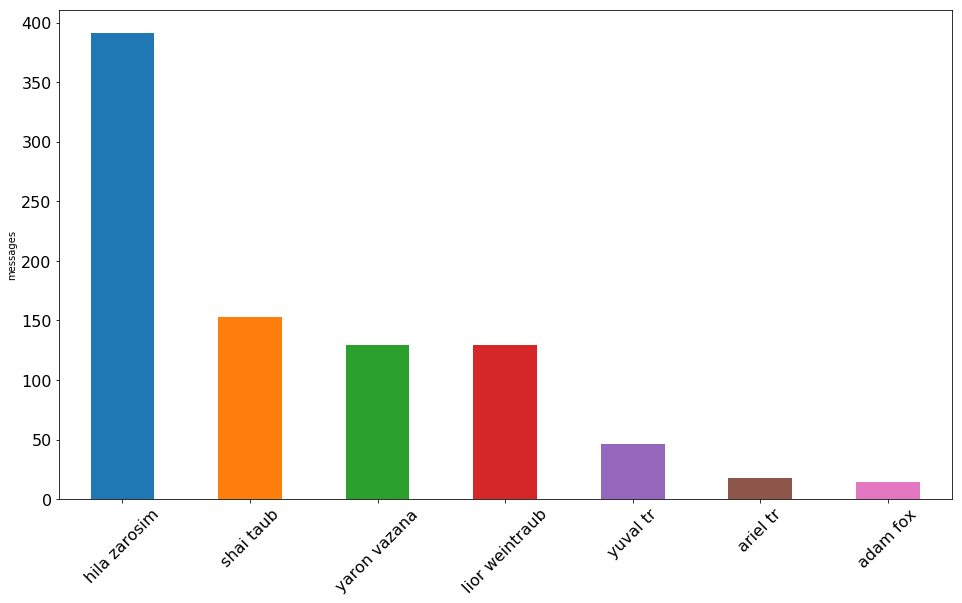

In [13]:
counts = df.groupby("name").name.count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16,9))
ax = counts.plot.bar(x='name', y='#messages', rot=45, ax=ax)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('')
plt.ylabel('messages')
plt.savefig('messages-freq.png')
None

# Who sends the longest messages?

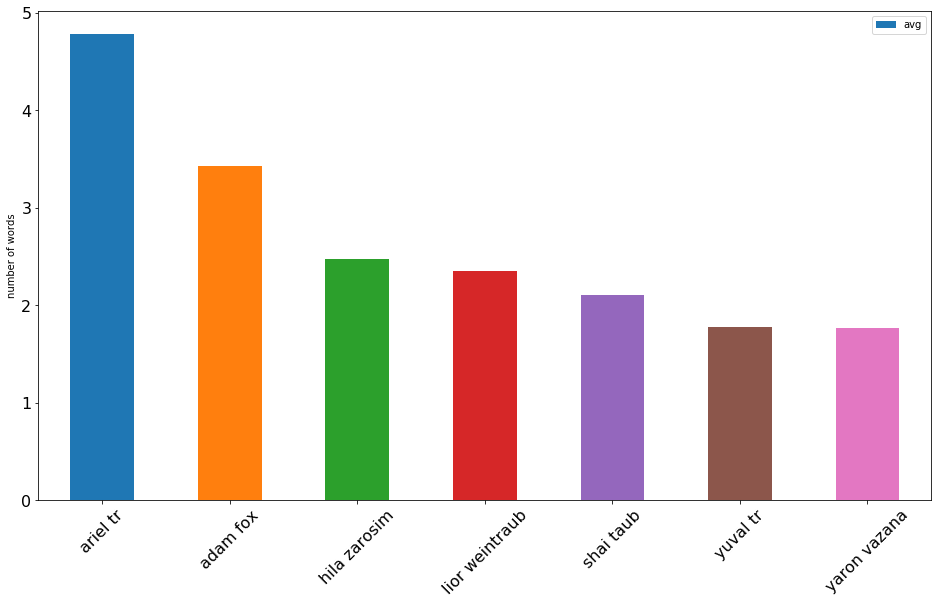

In [14]:

def f(x):
    return pd.Series({'message' : "%s" % ';;;'.join(x['message'])})

def count_avg(sents):
    sents = sents.split(";;;")
    sents_lengthes = 0
    for s in sents:
        sents_lengthes += len(s.split(" "))
    total_sents = len(sents)
    return round(sents_lengthes / total_sents, 2)
    
msgs = df.groupby('name').apply(f).reset_index()

msgs['avg'] = msgs['message'].apply(lambda x: count_avg(x))
msgs = msgs.sort_values(by='avg',ascending=False)

fig, ax = plt.subplots(figsize=(16,9))
ax = msgs.plot.bar(x='name', y='avg', rot=45, ax=ax)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('')
plt.ylabel('number of words')
plt.savefig('words-avg.png')
None

# Which words are the most common?

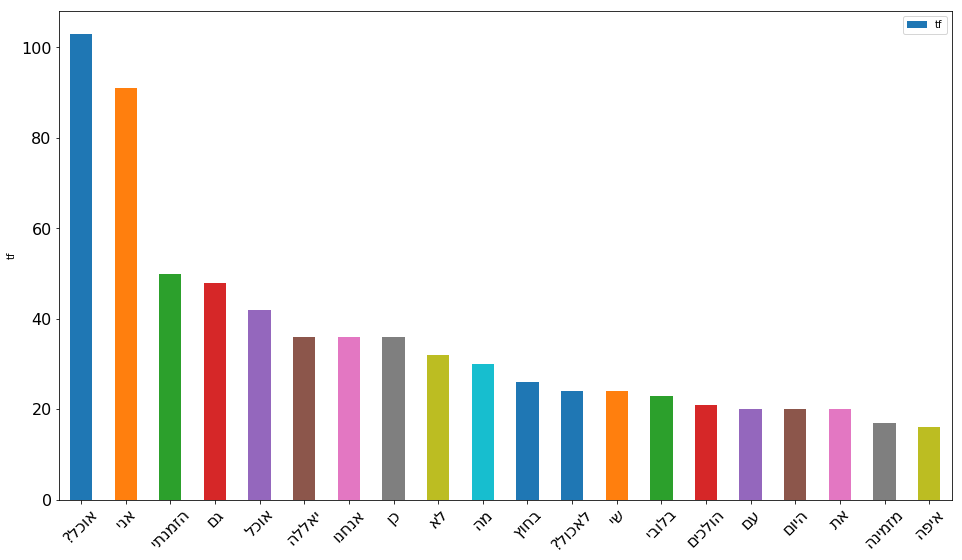

In [15]:
sents = list(df['message'])
tf_dict = {}
for s in sents:
    words = s.split(" ")
    for w in words:
        if w in tf_dict:
            tf_dict[w] = tf_dict[w] + 1
        else:
            tf_dict[w] = 1
s = [(k, tf_dict[k]) for k in sorted(tf_dict, key=tf_dict.get, reverse=True)]

x = []
y = []
for k, v in s[:20]:
    x.append(v)
    y.append(k)
tf_df = pd.DataFrame({'term': y, 'tf': x})

# display(tf_df)

tf_df['term'] = tf_df['term'].apply(lambda x: x[::-1])

fig, ax = plt.subplots(figsize=(16,9))
ax = tf_df.plot.bar(x='term', y='tf', rot=45, ax=ax)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('')
plt.ylabel('tf')
plt.savefig('most-common-unigrams.png')
None

# Which words each one is using?

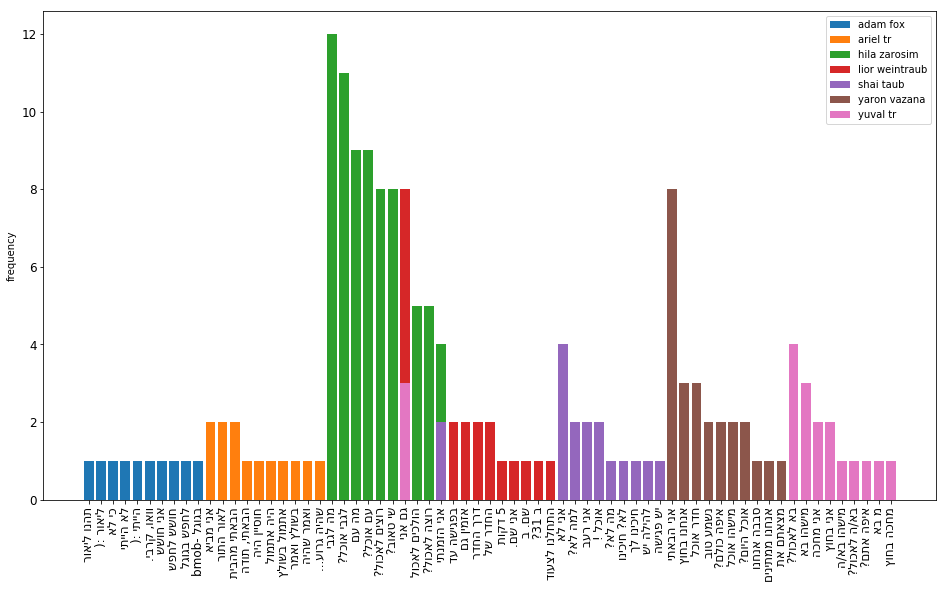

In [16]:
def f(x):
    return pd.Series({'message' : "%s" % ';;;'.join(x['message'])})

def get_top_n_terms(sents, n):
    sents = sents.split(";;;")
    tf_dict = {}
    for s in sents:
        bigrams = [b for b in zip(s.split(" ")[:-1], s.split(" ")[1:])]
        for b in bigrams:
            key = b[0] + " " + b[1]
            if key in tf_dict:
                tf_dict[key] = tf_dict[key] + 1
            else:
                tf_dict[key] = 1
    s = [(k, tf_dict[k]) for k in sorted(tf_dict, key=tf_dict.get, reverse=True)]
    return s[:n]
    

msgs_for_person = df.groupby('name').apply(f).reset_index()

msgs_for_person['counts'] = msgs_for_person['message'].apply(lambda x: get_top_n_terms(x, 10))

msgs_for_person.head()


fig, ax = plt.subplots(figsize=(16,9))

persons = []
for r in range(len(msgs_for_person)):
    x = []
    y = []
    l = msgs_for_person.iloc[r].counts
    for i in range(len(l)):
        x.append(l[i][0][::-1])
        y.append(l[i][1])
    ax.bar(x, y, width=0.8)
    persons.append(msgs_for_person.iloc[r]['name'])
    
plt.legend(persons)

plt.tick_params(axis='both', labelsize=12)
plt.xlabel('')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.savefig('bigrams-for-person.png')
None

# Creating a ChatBot

In [7]:
train_data = pd.DataFrame(columns = ['id','text','response','name'])
prev_msg = ''
for index, row in df.iterrows():
    if prev_msg != '':
        tmp = pd.DataFrame({'text': [prev_msg], 'response': [row['message']], 'id': [row['id']], 'name': [row['name']]})        
        train_data = train_data.append(tmp[['id','text','response','name']], ignore_index=True)
    prev_msg = row['message']
display(train_data)

,id,text,response,name
0,1,אוכל?,למה לא?,shai taub
1,2,למה לא?,יאללה,hila zarosim
2,3,יאללה,אוכל?,hila zarosim
3,4,אוכל?,5 דקות,lior weintraub
4,5,5 דקות,פוד?,yaron vazana
5,6,פוד?,אוכלת בבית,hila zarosim
6,7,אוכלת בבית,בתאבון,hila zarosim
7,8,בתאבון,אוכל,hila zarosim
8,9,אוכל,מה עם אוכל?,hila zarosim
9,10,מה עם אוכל?,לא,lior weintraub


In [8]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
import multiprocessing
import os
class MyTexts(object):
    def __iter__(self):
        for i in range(len(train_data)):
            yield TaggedDocument(words=simple_preprocess(train_data['text'][i]), tags=[train_data['id'][i]])

In [9]:
%%time
assert gensim.models.doc2vec.FAST_VERSION > -1
print('Training the model...')
cores = multiprocessing.cpu_count()
texts = MyTexts()
doc2vec_model = Doc2Vec(vector_size=300, workers=cores, min_count=1, window=3, negative=5)
doc2vec_model.build_vocab(texts)
doc2vec_model.train(texts, total_examples=doc2vec_model.corpus_count, epochs=20)

if not os.path.exists('models'):
    os.makedirs('models')
doc2vec_model.save('models/doc2vec.model')
doc2vec_model.save_word2vec_format('models/trained.word2vec')
print('Done!')

Training the model...
Done!
CPU times: user 1.95 s, sys: 66.7 ms, total: 2.02 s
Wall time: 2.17 s


In [10]:
from colorama import Fore
from IPython.display import clear_output
from IPython.display import display
from ipywidgets import Output

def chatbot():
    quit=False
    responses = []
    
    while quit == False:
        text = str(input('Message: '))
        if text == 'quit()':
            quit=True
        else:
            tokens = text.split()
            ##infer vector for text the model may not have seen
            new_vector = doc2vec_model.infer_vector(tokens)
            ##find the most similar [i] tags
            index = doc2vec_model.docvecs.most_similar([new_vector], topn = 10)
            response = Fore.RED + 'Chatbot: ' + train_data.iloc[int(index[0][0])].response
            responses.append(response)
            out = Output()
            display(out)
            with out:
                clear_output()
                print(response)
            

In [11]:
chatbot()

Message:  quit()
